## Description:

    Use DeSeq2 to identify differential abundance among treatments
    Following  Ashley's succ-C notebook


# Setting variables

In [3]:
workDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/'
biomFileDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning/'

biomFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning/otu_table_wtax.biom'
metadataFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/metadata_RhizCG_merged.txt'
treeFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/fasttree/otusn.tree'

# Init

In [4]:
import pandas as pd
import pandas.rpy.common as com
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import brewer2mpl
from mpltools import style
from IPython.display import FileLink
style.use("ggplot")
%matplotlib inline

/opt/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:11: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  FutureWarning)
/opt/anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [5]:
%matplotlib inline
%load_ext rpy2.ipython

In [6]:
%%R
# The required package list:
reqpkg = c("plyr","BiocParallel","doParallel", "DESeq2", "foreach", "ggplot2", 
   "gridExtra","scales", "metagenomeSeq", "phyloseq", "dplyr", "tidyr", 
           "reshape", "vegan")
# Load all required packages and show version
for (i in reqpkg) {
    print(i)
    print(packageVersion(i))
    suppressMessages(library(i, quietly = TRUE, verbose = FALSE, 
                             warn.conflicts = FALSE, character.only = TRUE))
}

[1] "plyr"
[1] ‘1.8.3’
[1] "BiocParallel"
[1] ‘1.0.3’
[1] "doParallel"
[1] ‘1.0.8’
[1] "DESeq2"
[1] ‘1.6.3’
[1] "foreach"
[1] ‘1.4.2’
[1] "ggplot2"
[1] ‘1.0.1’
[1] "gridExtra"
[1] ‘2.0.0’
[1] "scales"
[1] ‘0.3.0’
[1] "metagenomeSeq"
[1] ‘1.11.10’
[1] "phyloseq"
[1] ‘1.10.0’
[1] "dplyr"
[1] ‘0.4.3’
[1] "tidyr"
[1] ‘0.3.1’
[1] "reshape"
[1] ‘0.8.5’
[1] "vegan"
[1] ‘2.3.0’


# Setting files

In [7]:
!cd $workDir; ln -f -s $biomFileDir$biomFile
!cd $workDir; ln -f -s $biomFileDir'../'$metadataFile
!cd $workDir; ls -thlc

total 17M
lrwxrwxrwx 1 bryan bryan  130 Nov 15 15:11 metadata_RhizCG_merged.txt -> /home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning/..//home/bryan/RhizCG/data/MiSeq_amplicon/metadata_RhizCG_merged.txt
lrwxrwxrwx 1 bryan bryan  143 Nov 15 15:11 otu_table_wtax.biom -> /home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning//home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning/otu_table_wtax.biom
-rw-rw-r-- 1 bryan bryan 467K Oct 29 11:04 PlantEnriched.pdf
-rw-rw-r-- 1 bryan bryan  16M Oct 29 10:43 bare-plant.csv


# Loading/editting OTU table

In [8]:
%%R -i biomFile -i metadataFile -i workDir -i treeFile
# loading
setwd(workDir)

## biom file
physeq = import_biom(biomFile, treeFile)

## loading sample metadata
sample.data = import_qiime_sample_data(metadataFile)
physeq = merge_phyloseq(physeq,sample.data)



### apply gsub across columns replacing __ w/ "" reload tax_table to phyloseq object

In [9]:
%%R
t = tax_table(physeq)
t = apply(t, 2, function(y) gsub("__", "", y))
tax_table(physeq) = t

Remove controls and relevel factors so that bare is the reference level

In [10]:
%%R
#remove controls
physeq = subset_samples(physeq, !is.na(Plant))
#re-order levels 
sample_data(physeq)$Plant = relevel(sample_data(physeq)$Plant, "BARE")

# Filter samples
Initial run without filtering, consider filtering to test effects
 

## Create DeSeq2 object

In [11]:
%%R
library("BiocParallel")
register(MulticoreParam(6))

### Initial run is all plants, which will group bare soils into a single group

In [12]:
%%R
#s = sample_data(physeq)
#s$Planted = factor(ifelse(s$Plant == "BARE", "BARE", "Rhizosphere"))
#sample_data(physeq) = s
#sample_data(physeq) %>% str()

NULL


In [13]:
%%R
#p.dds = phyloseq_to_deseq2(physeq, ~Planted)
#p.dds = DESeq(p.dds, test = "Wald", fitType="parametric", parallel = TRUE)

NULL


In [14]:
%%R
plotDispEsts(p.dds)


Error in plotDispEsts(p.dds) : 
  error in evaluating the argument 'object' in selecting a method for function 'plotDispEsts': Error: object 'p.dds' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in plotDispEsts(p.dds) : 
  error in evaluating the argument 'object' in selecting a method for function 'plotDispEsts': Error: object 'p.dds' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [15]:
%%R
sample_data(physeq)$DAP = factor(sample_data(physeq)$DAP) 
sample_data(physeq)$DAP %>% levels

[1] "36" "53" "57" "61" "72" "79" "84" "88"


In [16]:
%%R
res=results(p.dds, contrast=
                    c("Plant","HELAN", "BARE"), parallel = TRUE)
res


Error in "results" %in% mcols(mcols(object))$type : 
  error in evaluating the argument 'table' in selecting a method for function '%in%': Error in mcols(mcols(object)) : 
  error in evaluating the argument 'x' in selecting a method for function 'mcols': Error in mcols(object) : 
  error in evaluating the argument 'x' in selecting a method for function 'mcols': Error: object 'p.dds' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in "results" %in% mcols(mcols(object))$type : 
  error in evaluating the argument 'table' in selecting a method for function '%in%': Error in mcols(mcols(object)) : 
  error in evaluating the argument 'x' in selecting a method for function 'mcols': Error in mcols(object) : 
  error in evaluating the argument 'x' in selecting a method for function 'mcols': Error: object 'p.dds' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [17]:
%%R
#summary(res) %>% print
plotMA(res, main="DESeq2", ylim=c(-2,2))


Error in plotMA(res, main = "DESeq2", ylim = c(-2, 2)) : 
  object 'res' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in plotMA(res, main = "DESeq2", ylim = c(-2, 2)) : 
  object 'res' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


# Function generating plant log2fold change figure

In [18]:
%%R


asNumeric = function(x) { as.numeric(as.character(x)) }

get_Ps = function(physeq.obj) {
    diagdds = phyloseq_to_deseq2(physeq.obj, ~Plant)
    diagdds = DESeq(diagdds, quiet = TRUE, parallel = TRUE)
    theta = 0.5
    r = results(diagdds)
    beta = r$log2FoldChange
    betaSE = r$lfcSE
    p = pnorm(beta, theta, betaSE, lower.tail = FALSE)
    r$p = p
    return(r[, c("log2FoldChange", "p")])
}

#Function to trim physeq object to just samples to include in Deseq analysis
deseq_prune = function(physeq.obj, plant, day) {
    physeq.md = sample_data(physeq.obj)
    p = prune_samples((physeq.md$Plant %in% c("BARE", plant))&
                     (physeq.md$DAP == day), physeq.obj)
    p.thresh = filter_taxa(p, function(x) sum(x > 0) > (0.02 * length(x)), TRUE)
    return(p.thresh)
}

## loop through sampling dates to compare enrichment in rhizosphere to bare soil

In [19]:
%%R -w 1200 -h 600
Sd = sample_data(physeq)

days = levels(Sd$DAP)
res.list = vector("list", length(days))
names(res.list) = as.character(days)
res.list

df_all = data.frame()
df_plant = data.frame()

for (day in days) {
    #print(day) ##need to remove
    Sd.d = Sd[Sd$DAP == day,]
    Sd.d = Sd.d[Sd.d$Plant != "BARE"]
    Plants = levels(Sd.d$Plant) 
    #Plants %>% print
    
    res.list.list = NULL        
    res.list.list = vector("list", length(Plants))
    names(res.list) = Plants
    
    
    for (plant in Plants) {
        DF = NULL
        
        #Trim physeq object by to day-plant combo 
        physeq.plant = deseq_prune(physeq, plant, day)
        
        #re-order levels 
        sample_data(physeq.plant)$Plant = relevel(sample_data(physeq.plant)$Plant, "BARE")
        
        #convert to deseq using function above
        DF = get_Ps(physeq.plant)
        
        supp = tax_table(physeq.plant)
            if (!setequal(row.names(DF), row.names(supp))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  
   
        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)
        DF$Day = day
        DF$Plant = plant
        df_plant = rbind(df_plant, DF)     
    }

}
df_all = df_plant  

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: converting counts to integer mode

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [2]:
%%R
dim(df_all) %>% print
Otu_sel = df_all$OTU == "OTU.5899"
Otest = df_all[Otu_sel,]
Otest

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


ERROR: Cell magic `%%R` not found.


In [64]:
%%R -i workDir
df_all$p.adj = p.adjust(df_all$p, "BH")
setwd(workDir)
write.table(df_all, "bare-plant.csv", row.names = FALSE, sep = ",")

# Checkpoint, read file of bare-plant.csv to continue

In [65]:
%%R -i workDir
setwd(workDir)
df_all = read.csv("bare-plant.csv", header = TRUE)
head(df_all)

  log2FoldChange         p    Rank1         Rank2      Rank3
1     -1.2367952 0.9546068 Bacteria Acidobacteria      32-21
2     -0.9585578 0.9991682 Bacteria Acidobacteria Holophagae
3      1.2749069 0.1830659 Bacteria Acidobacteria Holophagae
4     -0.9888109 0.9999998 Bacteria Acidobacteria Holophagae
5     -0.6785618 0.9673205 Bacteria Acidobacteria Holophagae
6     -3.2346654 0.9988116 Bacteria Acidobacteria     BPC102
                 Rank4                Rank5 Rank6 Rank7 Rank8      OTU Day
1 uncultured_bacterium                 <NA>  <NA>  <NA>  <NA> OTU.5899  36
2              Sva0725                 <NA>  <NA>  <NA>  <NA> OTU.8680  36
3              Sva0725 uncultured_bacterium  <NA>  <NA>  <NA> OTU.2666  36
4              Sva0725                 <NA>  <NA>  <NA>  <NA>  OTU.323  36
5              Sva0725                 <NA>  <NA>  <NA>  <NA> OTU.7636  36
6 uncultured_bacterium                 <NA>  <NA>  <NA>  <NA> OTU.3772  36
  Plant     p.adj
1 FAGES 1.0000000
2 FAGES 1.00

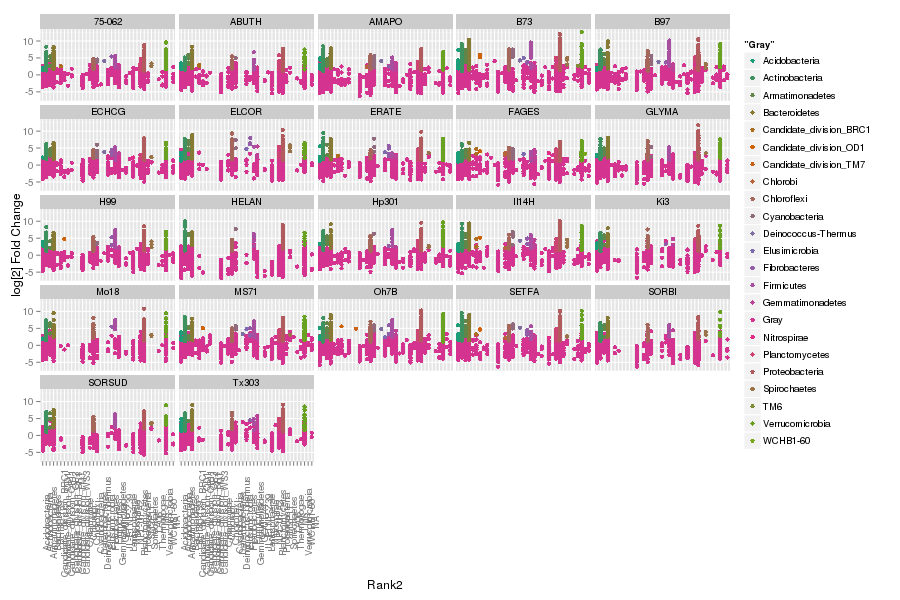

In [66]:
%%R -w 900 -h 600

colourCount = length(unique(df_all$Rank2)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Dark2"))

df.sig = df_all[df_all$p.adj < .05,]
df.ns = df_all[df_all$p.adj >= .05,]

p = ggplot(df_all)+
    geom_point(data = df.ns, aes(Rank2, log2FoldChange, color = "Gray", position = "jitter")) +
    scale_shape_identity() +
    geom_point(data = df.sig, aes(Rank2, log2FoldChange, color = Rank2, position = "jitter")) +
    
               #geom_hline(y_intercept = .4) +
    
    facet_wrap(~Plant)+
    theme(axis.text.x = element_text(angle = 90)) +
    labs(y = "log[2] Fold Change") 

p = p + scale_color_manual(values = getPalette(colourCount))
#p = p + geom_point(alpha = 1.00, shape = 21, size = 1.5)
#p = p + theme_bw()




#p = p + geom_hline(y = l2fc.threshold)



#p = p + theme(axis.text.x = element_blank())

#p = p + labs(x = "Phylum", color = "Phylum")

#p = p + guides(col = guide_legend(ncol = 2))

#p = p + labs(y = expression(paste("", log[2]," Fold Change",sep="")))

#p = p + guides(colour = guide_legend(override.aes = list(size=4)))

p    
    

## Create same figure as above, but export to pdf with different plant on each page

In [67]:
%%R

PlantList

 [1] "75-062" "ABUTH"  "AMAPO"  "B73"    "B97"    "ECHCG"  "ELCOR"  "ERATE" 
 [9] "FAGES"  "GLYMA"  "H99"    "HELAN"  "Hp301"  "Il14H"  "Ki3"    "Mo18"  
[17] "MS71"   "Oh7B"   "SETFA"  "SORBI"  "SORSUD" "Tx303" 


In [74]:
%%R -w 900 -h 600

colourCount = length(unique(df_all$Rank2)) + 1
getPalette = colorRampPalette(brewer.pal(10, "Dark2"))

PlantList = levels(df_all$Plant)

pdf(file = "PlantEnriched.pdf")

for (plant in PlantList) {
    pl = df_all$Plant == plant
    df_plant = df_all[pl,]
    
df.sig = df_plant[df_plant$p.adj < .05,]
df.ns = df_plant[df_plant$p.adj >= .05,]

p = ggplot(df_plant)+
    geom_point(data = df.ns, aes(Rank2, log2FoldChange, color = "White", position = "jitter")) +
    scale_shape_identity() +
    geom_point(data = df.sig, aes(Rank2, log2FoldChange, color = Rank2, position = "jitter")) +
    
    ggtitle(paste(plant)) +
    
    theme(axis.text.x = element_text(angle = 90)) +
    labs(y = "log[2] Fold Change") 

p = p + scale_color_manual(values = getPalette(colourCount))
print(p)    
    }

dev.off()

png 
  2 


The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


## Test for log2Fold change between plants with significant or non-significant increase in LAP

### Define enzyme significance variable, subset phyloseq object to 0N and join

In [24]:
%%R
#Create table with enzyme rhizosphere effect encoding
P = c("FAGES", "AMAPO", "ECHCG", "ABUTH","GLYMA", "SETFA", "75-062", "ERATE", "H99", "Il14H", "MS71",
      "B73", "B97", "Hp301", "Oh7B", "HELAN", "SORBI", "SORSUD", "ELCOR", "Ki3", "Mo18", "Tx303")
E.s = c(1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1)

E.re = data.frame(P,E.s)
E.re

        P E.s
1   FAGES   1
2   AMAPO   1
3   ECHCG   0
4   ABUTH   0
5   GLYMA   0
6   SETFA   1
7  75-062   0
8   ERATE   0
9     H99   0
10  Il14H   0
11   MS71   0
12    B73   0
13    B97   0
14  Hp301   0
15   Oh7B   1
16  HELAN   1
17  SORBI   1
18 SORSUD   1
19  ELCOR   1
20    Ki3   1
21   Mo18   0
22  Tx303   1


In [25]:
%%R
#subset phyloseq object to just unfertilized plots
physeq.plant = subset_samples(physeq, Plant != "BARE")
physeq.p.0N = subset_samples(physeq.plant, Treatment == "Nneg")
physeq.p.0N

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11246 taxa and 88 samples ]
sample_data() Sample Data:       [ 88 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 11246 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 11246 tips and 11245 internal nodes ]


In [26]:
%%R
#join enzyme factor to 
s.df = sample_data(physeq.p.0N)
s.df.e = left_join(s.df, E.re, by = c("Plant" = "P"))

s.df.e$E.s = factor(s.df.e$E.s)
s.df.e$E.s = gsub("1", "sig", s.df.e$E.s)
s.df.e$E.s = gsub("0", "ns", s.df.e$E.s)
s.df.e[,c("Plant","E.s")]
rownames(s.df.e) = s.df.e$X.sample

sample_data(physeq.p.0N) = s.df.e
sample_data(physeq.p.0N)$E.s = factor(sample_data(physeq.p.0N)$E.s)

### Generate DESeq object testing Enzyme significance 

In [27]:
%%R
p.dds = phyloseq_to_deseq2(physeq.p.0N, ~E.s)
p.dds = DESeq(p.dds, test = "Wald", fitType="parametric", parallel = TRUE)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: estimating size factors

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: estimating dispersions

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: gene-wise dispersion estimates: 6 workers

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: mean-dispersion relationship

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: final dispersion estimates, MLE betas: 6 workers

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106:

In [28]:
%%R
res = results(p.dds, cooksCutoff = FALSE)
alpha = 0.05
sigtab = res[which(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.p.0N)[rownames(sigtab), ], "matrix"))
sigtab

             baseMean log2FoldChange     lfcSE      stat       pvalue
OTU.1687    6.0066021     -0.8250315 0.2556059 -3.227749 1.247686e-03
OTU.9126    2.2079591      1.0675347 0.3140099  3.399685 6.746363e-04
OTU.10951   2.2752919     -0.9997625 0.3108944 -3.215762 1.300985e-03
OTU.983     2.8866524     -0.9881422 0.2755429 -3.586164 3.355777e-04
OTU.61     23.1745333     -0.6661475 0.1873201 -3.556198 3.762603e-04
OTU.577     2.7574852     -0.9471731 0.2912622 -3.251960 1.146123e-03
OTU.5442    1.2556075     -1.8237748 0.4436288 -4.111038 3.938846e-05
OTU.5401    0.8872441      1.1454336 0.3556746  3.220454 1.279879e-03
OTU.3114    8.1467157     -1.1343799 0.3288772 -3.449250 5.621457e-04
OTU.113     7.5558939     -0.9248333 0.2351530 -3.932901 8.392676e-05
OTU.593     3.2745283     -0.9174990 0.2583178 -3.551823 3.825727e-04
OTU.11563   0.7861542     -1.7496341 0.4179173 -4.186556 2.832196e-05
OTU.432     7.3793413     -1.0075200 0.2586513 -3.895284 9.808391e-05
OTU.990     1.112544

In [29]:
%%R
head(res)

log2 fold change (MAP): E.s sig vs ns 
Wald test p-value: E.s sig vs ns 
DataFrame with 6 rows and 6 columns
             baseMean log2FoldChange     lfcSE        stat     pvalue      padj
            <numeric>      <numeric> <numeric>   <numeric>  <numeric> <numeric>
OTU.5899  0.196153622   -0.153326314 0.4949970 -0.30975198 0.75674957        NA
OTU.11339 0.000000000             NA        NA          NA         NA        NA
OTU.11867 0.008960009   -0.006699161 0.2994993 -0.02236787 0.98215451        NA
OTU.12445 0.000000000             NA        NA          NA         NA        NA
OTU.8680  2.601542218   -0.700812027 0.2811857 -2.49234570 0.01269025 0.1363871
OTU.2666  0.620605884   -0.178822977 0.3837618 -0.46597389 0.64123419 0.8425452


In [30]:
###Graph of taxa with significant log2fold change

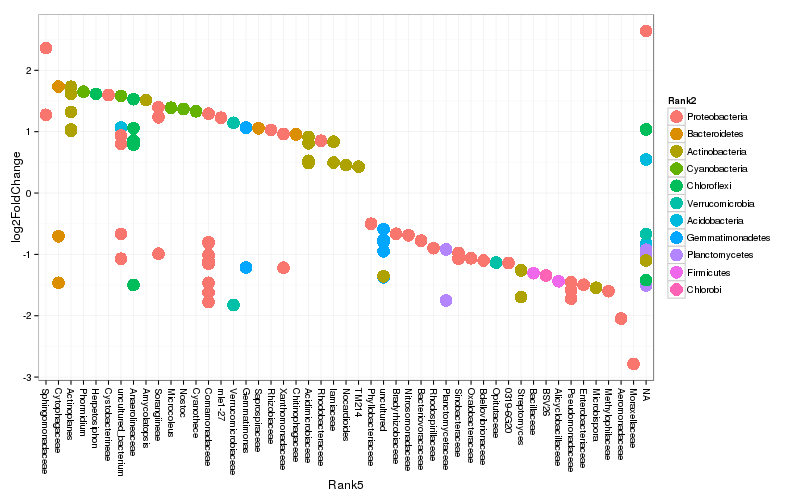

In [31]:
%%R -w 800 -h 500
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank2 = factor(as.character(sigtab$Rank2), levels=names(x))
# Genus order
x = tapply(sigtab$log2FoldChange, sigtab$Rank5, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank5 = factor(as.character(sigtab$Rank5), levels=names(x))
ggplot(sigtab, aes(x=Rank5, y=log2FoldChange, color=Rank2)) + geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

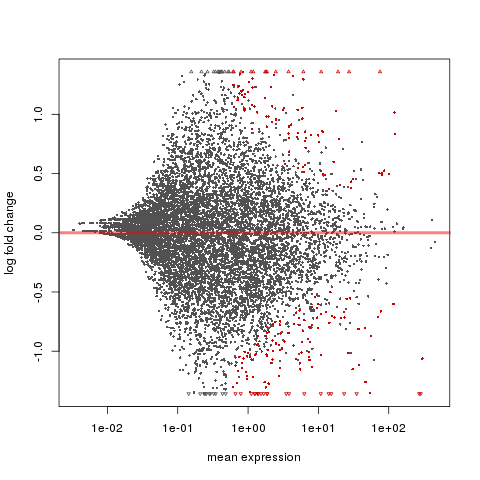

In [32]:
%%R
DESeq2::plotMA(res)